In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import statistics
from scipy import stats
from datetime import datetime
from datetime import timedelta
from matplotlib.font_manager import FontProperties
from sklearn import cluster

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


In [2]:
customers = pd.read_csv('/Users/apple-indonesia/Desktop/customers_dataset.csv')
order_payments = pd.read_csv('/Users/apple-indonesia/Desktop/order_payments_dataset.csv')
orders = pd.read_csv('/Users/apple-indonesia/Desktop/orders_dataset.csv')


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [5]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [6]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
df1 = order_payments.merge(orders, left_on = "order_id", right_on = "order_id", how = 'inner')
df1.tail(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58,4c7f868f43b5cff577b0becb8c8b7860,delivered,2017-12-05 08:18:35,2017-12-06 02:50:09,2017-12-08 00:51:47,2018-02-05 14:59:09,2017-12-29 00:00:00


In [10]:
df_final = df1.merge(customers, left_on = "customer_id", right_on = "customer_id", how = "inner")
df_final.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
order_id                         103886 non-null object
payment_sequential               103886 non-null int64
payment_type                     103886 non-null object
payment_installments             103886 non-null int64
payment_value                    103886 non-null float64
customer_id                      103886 non-null object
order_status                     103886 non-null object
order_purchase_timestamp         103886 non-null object
order_approved_at                103711 non-null object
order_delivered_carrier_date     101998 non-null object
order_delivered_customer_date    100754 non-null object
order_estimated_delivery_date    103886 non-null object
customer_unique_id               103886 non-null object
customer_zip_code_prefix         103886 non-null int64
customer_city                    103886 non-null object
customer_state                   103886 non-null ob

### Change the data type of following features to datetime

In [12]:
df_final["order_purchase_timestamp"] = pd.to_datetime(df_final["order_purchase_timestamp"])
df_final["order_approved_at"] = pd.to_datetime(df_final["order_approved_at"])
df_final["order_delivered_carrier_date"] = pd.to_datetime(df_final["order_delivered_carrier_date"])
df_final["order_delivered_customer_date"] = pd.to_datetime(df_final["order_delivered_customer_date"])
df_final["order_estimated_delivery_date"] = pd.to_datetime(df_final["order_estimated_delivery_date"])

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
order_id                         103886 non-null object
payment_sequential               103886 non-null int64
payment_type                     103886 non-null object
payment_installments             103886 non-null int64
payment_value                    103886 non-null float64
customer_id                      103886 non-null object
order_status                     103886 non-null object
order_purchase_timestamp         103886 non-null datetime64[ns]
order_approved_at                103711 non-null datetime64[ns]
order_delivered_carrier_date     101998 non-null datetime64[ns]
order_delivered_customer_date    100754 non-null datetime64[ns]
order_estimated_delivery_date    103886 non-null datetime64[ns]
customer_unique_id               103886 non-null object
customer_zip_code_prefix         103886 non-null int64
customer_city                    103886 non-null object
customer_st

# Univariate Analysis

In [14]:
nums = ['payment_sequential', 'payment_installments', 'payment_value', 'customer_zip_code_prefix']
cats = ['order_id', 'payment_type', 'customer_id', 'customer_unique_id', 'customer_city', 'customer_state']

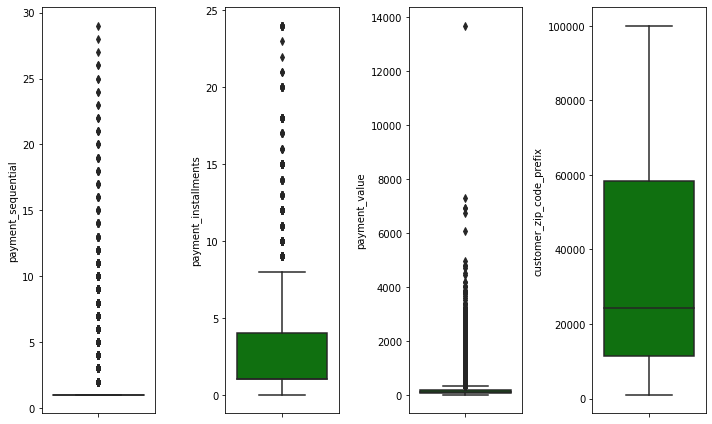

In [15]:
features = nums
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_final[features[i]], color='green', orient='v')
    plt.tight_layout()

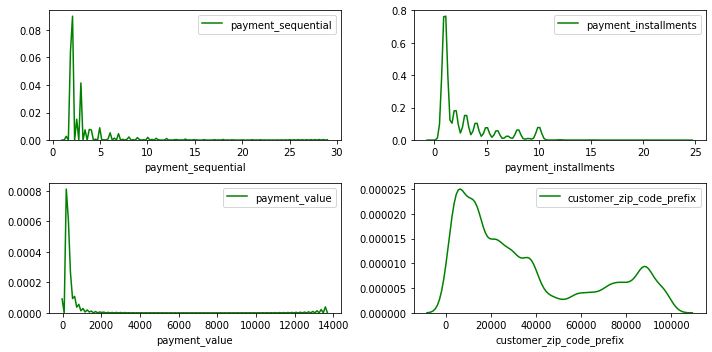

In [16]:
features = nums
plt.figure(figsize=(10, 5))
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.kdeplot(data=df_final[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

## Handling outliers

In [17]:
Q1 = df_final['payment_value'].quantile(0.25)
Q3 = df_final['payment_value'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 56.79

Q3:
 171.8375

IQR:
 115.04750000000001

Min:
 -115.78125000000003

Max:
 344.40875000000005


In [18]:
filter_price_min = df_final['payment_value']<boxplot_min
filter_price_max = df_final['payment_value']>boxplot_max

df_non_outlier = df_final[~
    (filter_price_min|filter_price_max)
    ]

df_non_outlier

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12,13f283df2f4760f22b57830865761d07,85869,foz do iguacu,PR
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65,d8f3aacf5cf5ddf9ceef4ad39e874c98,canceled,2018-03-15 10:06:35,2018-03-15 10:29:39,NaT,NaT,2018-04-06,0858c8086ef3b4bc86fef82638bcfa52,79118,campo grande,MS
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP


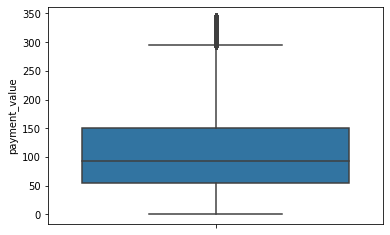

<Figure size 720x432 with 0 Axes>

In [19]:
## After outlier removed
sns.boxplot(x = df_non_outlier['payment_value'],data = df_non_outlier, orient = 'v')
plt.figure(figsize=(10,6))
plt.show()

In [20]:
df_final = df_non_outlier.copy()

## Handling missing values 

In [21]:
df_final.isna().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 154
order_delivered_carrier_date     1637
order_delivered_customer_date    2786
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [22]:
df_contain_null_1 = df_final[df_final["order_delivered_customer_date"].isnull()]

In [23]:
df_contain_null_1['order_status'].value_counts()

shipped        1073
unavailable     579
canceled        578
invoiced        277
processing      265
delivered         7
created           5
approved          2
Name: order_status, dtype: int64

In [24]:
df_contain_null_2 = df_final[df_final["order_approved_at"].isnull()]

In [25]:
df_contain_null_2['order_status'].value_counts()

canceled     137
delivered     12
created        5
Name: order_status, dtype: int64

In [26]:
df_contain_null_3 = df_final[df_final["order_delivered_carrier_date"].isnull()]

In [27]:
df_contain_null_3['order_status'].value_counts()

unavailable    579
canceled       507
invoiced       277
processing     265
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [28]:
df_clean = df_final.copy()

### Since the numbers of delivered and approved in dataset that contains missing values is few, therefore we will drop the missing values from df_final

In [29]:
df_clean.dropna(axis=0,inplace=True)
df_clean


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103876,0872d0faafe0cb56e6f2c594cca1522c,1,credit_card,2,127.92,dd2f0d64271438f6ad3a75d2a930a4b5,delivered,2017-09-26 12:10:26,2017-09-26 12:28:17,2017-10-02 15:18:57,2017-10-06 21:34:13,2017-10-26,4a57b2a3676de278e26a50b7e60214e6,37200,lavras,MG
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11,5b819ae762ee1d0424f92fd742a8ed7b,delivered,2018-03-06 20:19:31,2018-03-06 20:30:39,2018-03-08 18:17:02,2018-03-28 20:47:51,2018-04-11,18f40b803060d9883643b7e64e91628e,20030,rio de janeiro,RJ
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12,13f283df2f4760f22b57830865761d07,85869,foz do iguacu,PR
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG


In [30]:
df_clean.isna().sum()

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [31]:
df_final = df_clean.copy()
df_final.isna().sum()

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [32]:
### Impute the missing values in order_approved_at, order_delivered_carrier_date and order_delivered_customer_date with bfill method
#df_final["order_delivered_carrier_date"].fillna(method='bfill',axis=0,inplace=True)
#df_final["order_delivered_customer_date"].fillna(method='bfill',axis=0,inplace=True)
#df_final["order_approved_at"].fillna(method='bfill',axis=0,inplace=True)

### Check whether dataset contains duplicated data 

In [33]:
duplicates = df_final.duplicated()
duplicates.value_counts()

False    93106
dtype: int64

### Check typos in dataset

In [34]:
df_final['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [35]:
df_final['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [36]:
df_final['customer_state'].value_counts()

SP    39706
RJ    11998
MG    10940
RS     5116
PR     4736
SC     3365
BA     3175
DF     1971
ES     1925
GO     1870
PE     1475
CE     1147
PA      841
MT      797
MS      655
MA      642
RN      454
PB      454
PI      436
AL      340
SE      295
TO      258
RO      215
AM      135
AC       67
AP       60
RR       33
Name: customer_state, dtype: int64

In [37]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,93106.0,1.094827,0.677960,1.0,1.0,1.000,1.00,26.00
payment_installments,93106.0,2.629390,2.451304,0.0,1.0,1.000,3.00,24.00
payment_value,93106.0,110.011894,72.682926,0.0,54.0,92.205,150.46,344.34
customer_zip_code_prefix,93106.0,34752.198806,29749.432544,1003.0,11060.0,24220.000,57735.00,99980.00


### Mode

In [38]:
df_final_mode = df_final.mode()
df_final_mode

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,50.0,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20,9a736b248f67d166d2fbb006bcb877c3,22790,sao paulo,SP


### Range 

In [39]:
range_payment_sequential = max(df_final['payment_sequential'])-min(df_final['payment_sequential'])
range_payment_installment = max(df_final['payment_installments'])-min(df_final['payment_installments'])
range_payment_value = max(df_final['payment_value'])-min(df_final['payment_value'])

print(f'range of payment_sequential is {range_payment_sequential}')
print(f'range of payment_installments is {range_payment_installment}')
print(f'range of payment_value is {range_payment_value}')

range of payment_sequential is 25
range of payment_installments is 24
range of payment_value is 344.34


### Standard Deviation 

In [40]:
std_payment_sequential = df_final['payment_sequential'].std()
std_payment_installment = df_final['payment_installments'].std()
std_payment_value = df_final['payment_value'].std()

print(f'standard deviation of payment sequential is {std_payment_sequential}')
print(f'standard deviation of payment installment is {std_payment_installment}')
print(f'standard deviation of payment value is {std_payment_value}')

standard deviation of payment sequential is 0.6779595241112564
standard deviation of payment installment is 2.4513038077539453
standard deviation of payment value is 72.68292594382315


### Variance 

In [41]:
var_payment_sequential = statistics.variance(df_final['payment_sequential'])
var_payment_installment = statistics.variance(df_final['payment_installments'])
var_payment_value = statistics.variance(df_final['payment_value'])

print(f'variance payment_sequential is {var_payment_sequential}')
print(f'variance payment_installments is {var_payment_installment}')
print(f'variance payment_value is {var_payment_value}')

variance payment_sequential is 0.45962911633461684
variance payment_installments is 6.0088903579092445
variance payment_value is 5282.807723755086


### Coefficient of Variation

In [42]:
cov_payment_sequential = std_payment_sequential/np.mean(df_final['payment_sequential'])
cov_payment_installment = std_payment_installment/np.mean(df_final['payment_installments'])
cov_payment_value = std_payment_value/np.mean(df_final['payment_value'])

print(f'variance of payment sequential is {cov_payment_sequential}')
print(f'variance of payment installment is {cov_payment_installment}')
print(f'variance of payment value is {cov_payment_value}')

variance of payment sequential is 0.6192387251866645
variance of payment installment is 0.9322708540624596
variance of payment value is 0.6606824346051314


### Skewness 

In [43]:
skewness_payment_sequential = df_final['payment_sequential'].skew()
skewness_payment_installment = df_final['payment_installments'].skew()
skewness_payment_value = df_final['payment_value'].skew()

print(f'skewness of payment sequential is {skewness_payment_sequential}')
print(f'skewness of payment installment is {skewness_payment_installment}')
print(f'skewness of payment value is {skewness_payment_value}')

skewness of payment sequential is 14.55736118412801
skewness of payment installment is 1.792364233983555
skewness of payment value is 0.9984508842234572


### Kurtosis

In [44]:
kurtosis_payment_sequential = df_final['payment_sequential'].kurtosis()
kurtosis_payment_installment = df_final['payment_installments'].kurtosis()
kurtosis_payment_value = df_final['payment_value'].kurtosis()

print(f'kurtosis of payment sequential is {kurtosis_payment_sequential}')
print(f'kurtosis of payment installment is {kurtosis_payment_installment}')
print(f'kurtosis of payment value is {kurtosis_payment_value}')

kurtosis of payment sequential is 298.1050630816732
kurtosis of payment installment is 3.0734897747919137
kurtosis of payment value is 0.49603017798612603


### Create year, month and day features 

In [45]:
df_final['year_order'] = pd.to_datetime(df_final['order_purchase_timestamp']).dt.year
df_final['month_order'] = pd.to_datetime(df_final['order_purchase_timestamp']).dt.month
df_final['day_order'] = pd.to_datetime(df_final['order_purchase_timestamp']).dt.day_name()

In [46]:
df_final.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_order,month_order,day_order
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,2018,4,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,2018,6,Tuesday


In [47]:
df_final_1 = df_final.groupby(['year_order','month_order']).agg({'order_id': 'count'})
df_final_1

order_id
year_order month_order          
2016       10                256
           12                  1
2017       1                 708
           2                1605
           3                2494
           4                2231
           5                3502
           6                3094
           7                3884
           8                4077
           9                4010
           10               4311
           11               7013
           12               5342
2018       1                6839
           2                6325
           3                6729
           4                6502
           5                6445
           6                5824
           7                5840
           8                6074

# Number of orders per month

In [48]:
df_final_2 = df_final_1.reset_index()
df_final_2.rename(columns={'order_id': 'order_times'}, inplace=True)
df_final_2

,year_order,month_order,order_times
0,2016,10,256
1,2016,12,1
2,2017,1,708
3,2017,2,1605
4,2017,3,2494
5,2017,4,2231
6,2017,5,3502
7,2017,6,3094
8,2017,7,3884
9,2017,8,4077


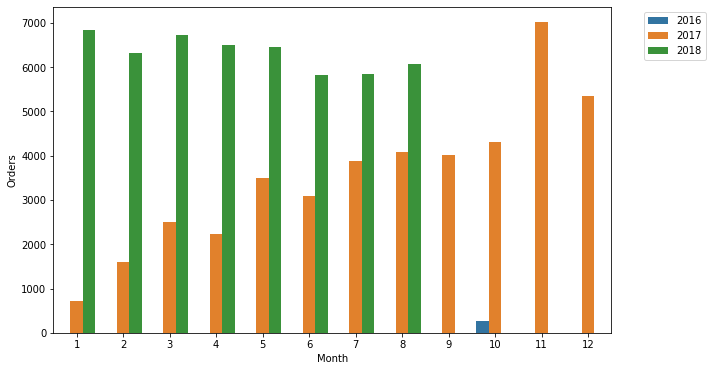

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_final_2['month_order'], y=df_final_2['order_times'], hue = df_final_2['year_order'])
#sns.barplot(x=df_final['year_order'], y=df_final['month_order'])
plt.xlabel("Month")
plt.ylabel("Orders")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### From above visualization, we can see in 2016 only October that produced some sales and its volume were very small compared to other year. In 2017 the volume sales trend was more to increase month by month and the peak was in November. In 2018 the volume sales performance of each month far surpassed the sales of last two years although it drastically decreased in month September and after that there were no more sales in the next incoming months


# Daily order trends (which day of the week is the busiest)

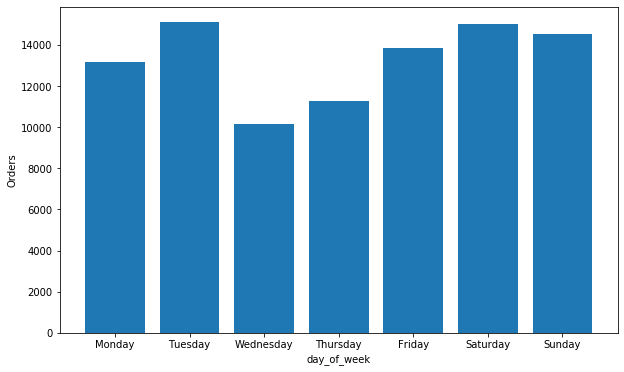

In [50]:
plt.figure(figsize=(10,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend = df_final.groupby('day_order')['order_id'].count()
x = range(len(order))
plt.bar(x, daily_trend, tick_label=order)
plt.xlabel("day_of_week")
plt.ylabel("Orders")
plt.show()

### From above visualization, it can be inferred that Tuesday is the most favourite day for customer to place orders

In [51]:
df2 = df_final.groupby('payment_type')['order_id'].count().reset_index()
df2['percentage'] = 100 * df2['order_id'] / df2['order_id'].sum()
df2

,payment_type,order_id,percentage
0,boleto,17953,19.282323
1,credit_card,68325,73.384100
2,debit_card,1406,1.510107
3,voucher,5422,5.823470


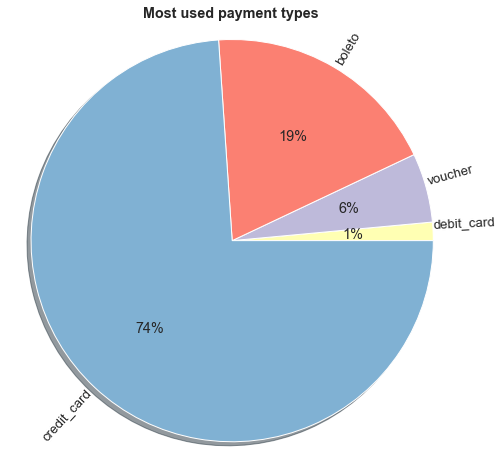

In [52]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8,8))
data = [3, 1529, 5775, 19784, 76795]
labels = ['not_defined', 'debit_card', 'voucher', 'boleto', 'credit_card']
colors = sns.color_palette('Set3')
patches, texts, autotexts = plt.pie(data, 
        labels = labels, 
        colors = colors, 
        autopct = "%1.0f%%", 
        rotatelabels='true', 
        shadow=True, 
        labeldistance= 1)

# Hide slice for 'not defined payment type' since it percentage is 0%
patches[0].set_visible(False)
texts[0].set_visible(False)
autotexts[0].set_visible(False)

plt.axis('equal')

font = FontProperties(weight='bold')
plt.title('Most used payment types', fontsize=18, fontproperties=font)
plt.show()

### From above visualization, it can be inferred that most of the payment was done in credit card

In [53]:
df_copy = df_final.copy()

In [54]:
df_copy.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_order,month_order,day_order
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,2018,4,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,2018,6,Tuesday
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,2017,12,Tuesday
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,2017,12,Wednesday
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,conchas,SP,2018,5,Monday


In [55]:
df_copy['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [56]:
df_copy = df_copy[df_copy['order_status'] == 'delivered']

In [57]:
df_copy.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_order,month_order,day_order
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,2018,4,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,2018,6,Tuesday


In [58]:
frequency = df_copy.groupby('customer_unique_id')['order_id'].nunique()

In [59]:
frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  8, 15])

In [60]:
frequency = pd.DataFrame(frequency)


In [61]:
frequency.sort_values(['order_id'], ascending=False)

,order_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,15
3e43e6105506432c953e165fb2acf44c,8
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
...,...
566ef46eec03ac4a0e424357fa71db1e,1
566d63563ccdeb800b9899c8063275b8,1
566c95a996d3f246348dbcf90fb380d5,1


In [62]:
frequency.rename(columns={'order_id': 'order_times'}, inplace=True)
frequency.reset_index()

,customer_unique_id,order_times
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
86156,fffbf87b7a1a6fa8b03f081c5f51a201,1
86157,fffea47cd6d3cc0a88bd621562a9d061,1
86158,ffff371b4d645b6ecea244b27531430a,1
86159,ffff5962728ec6157033ef9805bacc48,1


In [63]:
df_copy1 = df_final.copy()

In [64]:
monetary = df_copy1.groupby('customer_unique_id')['payment_value'].sum()
monetary.reset_index()

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
86162,fffbf87b7a1a6fa8b03f081c5f51a201,167.32
86163,fffea47cd6d3cc0a88bd621562a9d061,84.58
86164,ffff371b4d645b6ecea244b27531430a,112.46
86165,ffff5962728ec6157033ef9805bacc48,133.69


In [65]:
df_copy['diff'] = max(df_copy['order_purchase_timestamp']) - df_copy['order_purchase_timestamp']

In [66]:
recency = df_copy.groupby('customer_unique_id')['diff'].min()
recency.reset_index()

,customer_unique_id,diff
0,0000366f3b9a7992bf8c76cfdf3221e2,111 days 04:04:10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114 days 03:49:10
2,0000f46a3911fa3c0805444483337064,536 days 17:55:34
3,0000f6ccb0745a6a4b88665a16c9f078,320 days 18:30:56
4,0004aac84e0df4da2b147fca70cf8255,287 days 19:14:55
...,...,...
86156,fffbf87b7a1a6fa8b03f081c5f51a201,244 days 16:23:56
86157,fffea47cd6d3cc0a88bd621562a9d061,261 days 18:52:41
86158,ffff371b4d645b6ecea244b27531430a,567 days 23:11:21
86159,ffff5962728ec6157033ef9805bacc48,118 days 23:42:56


In [67]:
recency = pd.DataFrame(recency)
recency['diff'] = recency['diff'].dt.days
recency.reset_index()

,customer_unique_id,diff
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,536
3,0000f6ccb0745a6a4b88665a16c9f078,320
4,0004aac84e0df4da2b147fca70cf8255,287
...,...,...
86156,fffbf87b7a1a6fa8b03f081c5f51a201,244
86157,fffea47cd6d3cc0a88bd621562a9d061,261
86158,ffff371b4d645b6ecea244b27531430a,567
86159,ffff5962728ec6157033ef9805bacc48,118


In [68]:
rfm = pd.merge(recency, frequency, on='customer_unique_id', how='inner')

In [69]:
rfm = pd.merge(rfm, monetary, on='customer_unique_id', how='inner')
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm.reset_index()

In [70]:
rfm.head(2)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19


In [71]:
df_rfm = pd.merge(df_final, rfm, on="customer_unique_id", how="inner")
df_rfm.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_order,month_order,day_order,recency,frequency,monetary
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,2018,4,Wednesday,125,1,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,2018,6,Tuesday,64,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,2017,12,Tuesday,260,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,2017,12,Wednesday,266,1,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,4291db0da71914754618cd789aebcd56,18570,conchas,SP,2018,5,Monday,28,2,227.74


In [72]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93100 entries, 0 to 93099
Data columns (total 22 columns):
order_id                         93100 non-null object
payment_sequential               93100 non-null int64
payment_type                     93100 non-null object
payment_installments             93100 non-null int64
payment_value                    93100 non-null float64
customer_id                      93100 non-null object
order_status                     93100 non-null object
order_purchase_timestamp         93100 non-null datetime64[ns]
order_approved_at                93100 non-null datetime64[ns]
order_delivered_carrier_date     93100 non-null datetime64[ns]
order_delivered_customer_date    93100 non-null datetime64[ns]
order_estimated_delivery_date    93100 non-null datetime64[ns]
customer_unique_id               93100 non-null object
customer_zip_code_prefix         93100 non-null int64
customer_city                    93100 non-null object
customer_state              

In [73]:
df_cluster = df_rfm.copy()

In [74]:
df_dum = pd.get_dummies(df_rfm, columns=["payment_type"], prefix=["payment_type"])
df_rfm = df_rfm.merge(df_dum)
df_rfm

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,year_order,month_order,day_order,recency,frequency,monetary,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,2018,4,Wednesday,125,1,99.33,0,1,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,2018,6,Tuesday,64,1,24.39,0,1,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,2017,12,Tuesday,260,1,65.71,0,1,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,2017,12,Wednesday,266,1,107.78,0,1,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,2018,5,Monday,28,2,227.74,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93095,60aed0a4eba0e424eb3cac85017fd752,1,credit_card,10,170.14,c596bc25904f9043dae514f6a26c89d3,delivered,2018-06-18 13:07:05,2018-06-18 13:39:36,2018-06-19 14:30:00,...,2018,6,Monday,72,1,170.14,0,1,0,0
93096,0872d0faafe0cb56e6f2c594cca1522c,1,credit_card,2,127.92,dd2f0d64271438f6ad3a75d2a930a4b5,delivered,2017-09-26 12:10:26,2017-09-26 12:28:17,2017-10-02 15:18:57,...,2017,9,Tuesday,337,1,127.92,0,1,0,0
93097,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11,5b819ae762ee1d0424f92fd742a8ed7b,delivered,2018-03-06 20:19:31,2018-03-06 20:30:39,2018-03-08 18:17:02,...,2018,3,Tuesday,175,1,194.11,0,1,0,0
93098,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,...,2018,5,Wednesday,105,1,198.94,0,1,0,0


In [75]:
df_rfm = df_rfm.drop(['order_id','payment_sequential','payment_type','customer_unique_id','payment_installments','customer_id',
                      'order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                      'order_delivered_customer_date','order_estimated_delivery_date','customer_unique_id',
                     'customer_zip_code_prefix','customer_city','customer_state','year_order','month_order',
                     'day_order'], axis=1)
df_rfm

,payment_value,recency,frequency,monetary,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,99.33,125,1,99.33,0,1,0,0
1,24.39,64,1,24.39,0,1,0,0
2,65.71,260,1,65.71,0,1,0,0
3,107.78,266,1,107.78,0,1,0,0
4,128.45,28,2,227.74,0,1,0,0
...,...,...,...,...,...,...,...,...
93095,170.14,72,1,170.14,0,1,0,0
93096,127.92,337,1,127.92,0,1,0,0
93097,194.11,175,1,194.11,0,1,0,0
93098,198.94,105,1,198.94,0,1,0,0


In [76]:
#Standardization using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data_2 = scaler.fit_transform(df_rfm)
scaled_data_2 = pd.DataFrame(scaled_data_2)
scaled_data_2

,0,1,2,3,4,5,6,7
0,0.288465,0.180115,0.000000,0.069459,0.0,1.0,0.0,0.0
1,0.070831,0.092219,0.000000,0.013180,0.0,1.0,0.0,0.0
2,0.190829,0.374640,0.000000,0.044211,0.0,1.0,0.0,0.0
3,0.313005,0.383285,0.000000,0.075805,0.0,1.0,0.0,0.0
4,0.373032,0.040346,0.071429,0.165894,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
93095,0.494105,0.103746,0.000000,0.122637,0.0,1.0,0.0,0.0
93096,0.371493,0.485591,0.000000,0.090930,0.0,1.0,0.0,0.0
93097,0.563716,0.252161,0.000000,0.140638,0.0,1.0,0.0,0.0
93098,0.577743,0.151297,0.000000,0.144266,0.0,1.0,0.0,0.0


In [77]:
scaled_data_2.rename(columns={0: 'payment_value', 1: 'recency', 2: 'frequency', 3: 'monetary', 
                              4: 'payment_type_boleto', 5: 'payment_type_credit_card', 6: 'payment_type_debit_card',
                              7: 'payment_type_voucher'}, inplace=True)
scaled_data_2

,payment_value,recency,frequency,monetary,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.288465,0.180115,0.000000,0.069459,0.0,1.0,0.0,0.0
1,0.070831,0.092219,0.000000,0.013180,0.0,1.0,0.0,0.0
2,0.190829,0.374640,0.000000,0.044211,0.0,1.0,0.0,0.0
3,0.313005,0.383285,0.000000,0.075805,0.0,1.0,0.0,0.0
4,0.373032,0.040346,0.071429,0.165894,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
93095,0.494105,0.103746,0.000000,0.122637,0.0,1.0,0.0,0.0
93096,0.371493,0.485591,0.000000,0.090930,0.0,1.0,0.0,0.0
93097,0.563716,0.252161,0.000000,0.140638,0.0,1.0,0.0,0.0
93098,0.577743,0.151297,0.000000,0.144266,0.0,1.0,0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

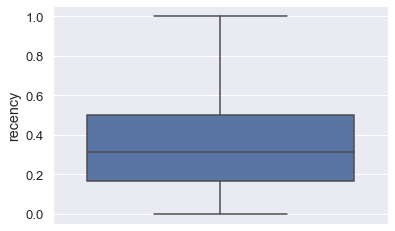

In [79]:
sns.boxplot(x=scaled_data_2['recency'],data=scaled_data_2, orient='v')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

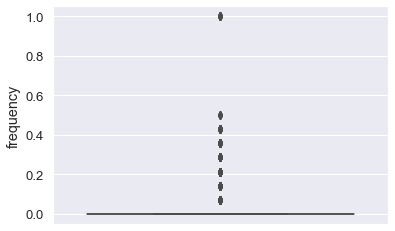

In [80]:
sns.boxplot(x=scaled_data_2['frequency'],data=scaled_data_2, orient='v')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

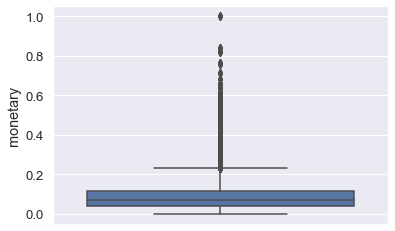

In [81]:
sns.boxplot(x=scaled_data_2['monetary'],data=scaled_data_2, orient='v')
plt.show

In [82]:
from scipy.cluster.vq import kmeans, vq

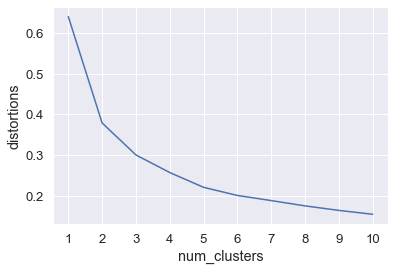

<Figure size 720x432 with 0 Axes>

In [83]:
distortions = []
num_clusters = range(1, 11)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(scaled_data_2,i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.figure(figsize=(10,6))
plt.show()

## Silhouette Analysis

In [ ]:
##silhoutte_analysis(scaled_data_2,[2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12])

In [85]:
rfm_model = cluster.KMeans(n_clusters=3, init='k-means++', random_state=3)
rfm_model.fit(scaled_data_2)
rfm_label = rfm_model.labels_
scaled_data_2.loc[:, 'customer_unique_id'] = rfm['customer_unique_id']
df_cluster['clusters'] = rfm_label

In [86]:
df_cluster.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_zip_code_prefix,customer_city,customer_state,year_order,month_order,day_order,recency,frequency,monetary,clusters
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,39801,teofilo otoni,MG,2018,4,Wednesday,125,1,99.33,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,2422,sao paulo,SP,2018,6,Tuesday,64,1,24.39,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,2652,sao paulo,SP,2017,12,Tuesday,260,1,65.71,0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,36060,juiz de fora,MG,2017,12,Wednesday,266,1,107.78,0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,18570,conchas,SP,2018,5,Monday,28,2,227.74,0


In [87]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93100 entries, 0 to 93099
Data columns (total 23 columns):
order_id                         93100 non-null object
payment_sequential               93100 non-null int64
payment_type                     93100 non-null object
payment_installments             93100 non-null int64
payment_value                    93100 non-null float64
customer_id                      93100 non-null object
order_status                     93100 non-null object
order_purchase_timestamp         93100 non-null datetime64[ns]
order_approved_at                93100 non-null datetime64[ns]
order_delivered_carrier_date     93100 non-null datetime64[ns]
order_delivered_customer_date    93100 non-null datetime64[ns]
order_estimated_delivery_date    93100 non-null datetime64[ns]
customer_unique_id               93100 non-null object
customer_zip_code_prefix         93100 non-null int64
customer_city                    93100 non-null object
customer_state              

### Cluster analysis 

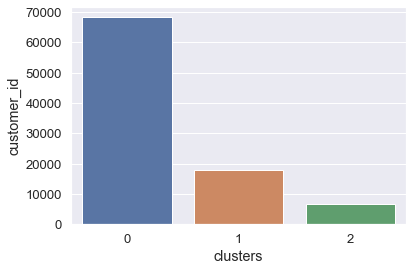

In [88]:
num_user_cluster = df_cluster.groupby('clusters')['customer_id'].count().reset_index()
sns.barplot(x=num_user_cluster.clusters, y=num_user_cluster.customer_id)

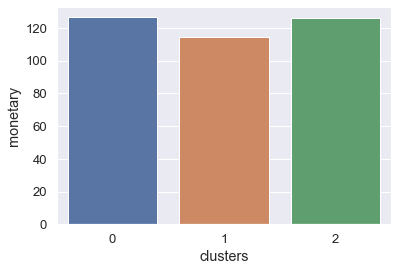

In [89]:
df_cluster1 = df_cluster.groupby('clusters')['frequency','monetary'].mean().reset_index()
sns.barplot(x=df_cluster1.clusters, y=df_cluster1.monetary)

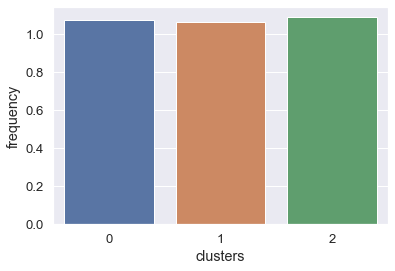

In [90]:
sns.barplot(x=df_cluster1.clusters, y=df_cluster1.frequency)

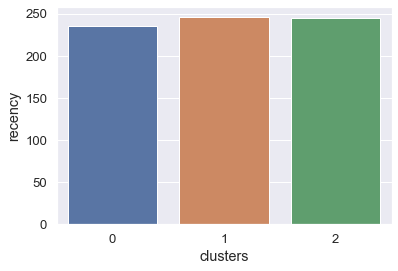

In [91]:
df_cluster2 = df_cluster.groupby('clusters')['recency'].mean().reset_index()
sns.barplot(x=df_cluster2.clusters, y=df_cluster2.recency)

In [92]:
df_cluster3 = df_cluster.groupby(['clusters','payment_type'])['clusters'].agg('count')
df_cluster3 = pd.DataFrame(df_cluster3)
df_cluster3

clusters
clusters payment_type          
0        credit_card      68319
1        boleto           17953
2        debit_card        1406
         voucher           5422

In [93]:
df_cluster4 = df_cluster.groupby('clusters')['payment_installments'].mean()
df_cluster4 = pd.DataFrame(df_cluster4)
df_cluster4

,payment_installments
clusters,
0,3.220422
1,1.000000
2,1.000000


##### From above analysis, we can undestand that: 
##### Cluster 0 : High spender and often do transactions and like to use credit card as type of payment also they prefer longer installments.
##### Cluster 1: Quite a high spender but not as high as cluster 0 and boleto is their favourite payment type.
##### Cluster 2: High spender and also ofter do transactions but they use debit card and voucher (most) as their payment type.

##### In term of recency, all the cluster almost have similar pattern.